In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import PIL
import matplotlib
import matplotlib.pyplot as plt
import urllib.request
from io import BytesIO

# I needed to run this command so the URLs were not truncated when printing them
pd.set_option('display.max_colwidth', None)


In [11]:
# Pedro's data path to files
data_path = "../../Downloads/final_project"

In [12]:
# Praksh
#Data path on your computer
# data_path = "../../Downloads/final_project"

In [13]:
# Waqas
#Data path on your computer
# data_path = "../../Downloads/final_project"

In [14]:
# Load data

kaggle_train_image_ids = pd.read_csv(f'{data_path}/kaggle_train.csv') # File path to download https://www.kaggle.com/competitions/landmark-recognition-2021/data?select=train.csv

full_train_image_ids = pd.read_csv(f'{data_path}/train/train_full.csv') # File path to download https://s3.amazonaws.com/google-landmark/metadata/train.csv
train_label_to_category = pd.read_csv(f'{data_path}/train/train_label_to_category.csv') # File path to download https://s3.amazonaws.com/google-landmark/metadata/train_label_to_category.csv


In [6]:
# Filtered the Google train set to get the URL of the images including only the ids that are in the Kaggle dataset (used pandas.isin feature)
# Then joined with the landmark to category to know which category is each and also include the URL to the category

join_w_landmark_id = full_train_image_ids[full_train_image_ids.id.isin(kaggle_train_image_ids.id.values)].join(train_label_to_category, on=["landmark_id"], how='left', rsuffix="_right")
join_w_landmark_id = join_w_landmark_id.drop(['landmark_id_right'], axis=1) # Dropped the right landmark_id column

In [7]:
# Display the top 20 categories 
print(join_w_landmark_id.groupby(['landmark_id', 'category'])['id'].count().sort_values(ascending=False).head(20))

landmark_id  category                                                                                         
138982       http://commons.wikimedia.org/wiki/Category:Media_contributed_by_the_ETH-Bibliothek                   6272
126637       http://commons.wikimedia.org/wiki/Category:Corktown,_Toronto                                         2231
20409        http://commons.wikimedia.org/wiki/Category:Noraduz_Cemetery                                          1758
83144        http://commons.wikimedia.org/wiki/Category:Museum_of_Folk_Architecture_and_Ethnography_in_Pyrohiv    1741
113209       http://commons.wikimedia.org/wiki/Category:Sal%C3%A8ve                                               1135
177870       http://commons.wikimedia.org/wiki/Category:Lviv                                                      1088
194914       http://commons.wikimedia.org/wiki/Category:Nieuwe_Waterweg                                           1073
149980       http://commons.wikimedia.org/wiki/Category:

In [8]:
# Display the top 10 entries of the Toronto landmark/category landmark_id==126637 which is the second on the list of categories 
print(join_w_landmark_id[join_w_landmark_id.landmark_id==126637].head(10))

                     id  \
241    d5079815d7067950   
1555   87febf8cbb078374   
4500   8f73932dff600c79   
6815   69f546123827e6f3   
7230   c8ba5eaf90e2ae6a   
7359   65c8d6c0a5b4b045   
14179  bbb06caf48ca3e51   
15937  35d1cc4912d4668a   
17148  5818d89e7eedca68   
19719  574fe5be047eebd0   

                                                                                                                                                                            url  \
241                         https://upload.wikimedia.org/wikipedia/commons/5/57/Toronto_tugboat_M.R._Kane_prepares_to_moor%2C_at_dusk%2C_2015_09_22_%285%29.JPG_-_panoramio.jpg   
1555                                                     https://upload.wikimedia.org/wikipedia/commons/c/c8/45_Parliament%2C_at_dusk%2C_2015_08_04_%281%29.JPG_-_panoramio.jpg   
4500                                        https://upload.wikimedia.org/wikipedia/commons/8/84/Excavation_at_the_old_National_Hotel_on_2014_03_29_%2816%29.JPG_-_pan

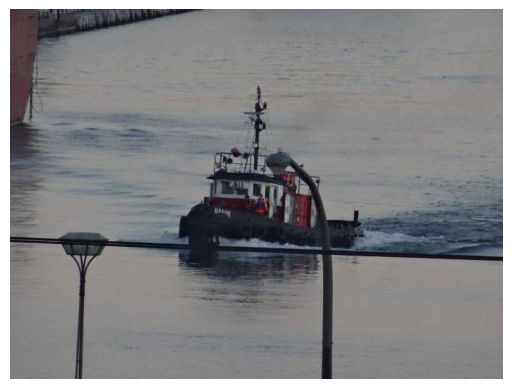

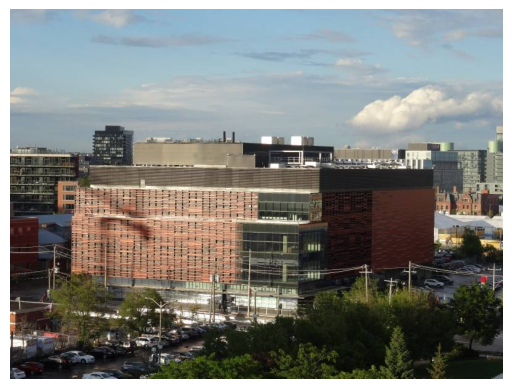

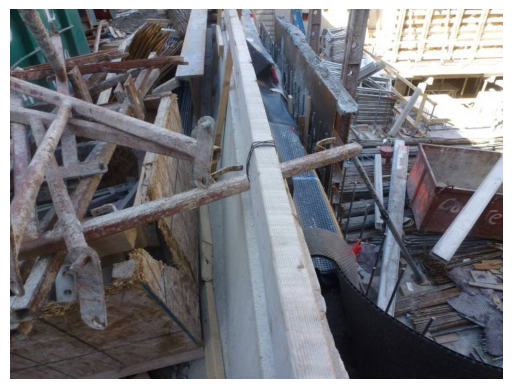

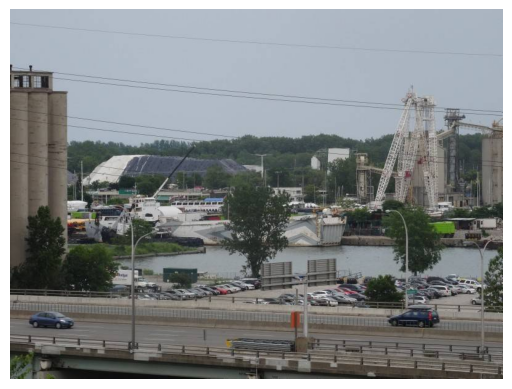

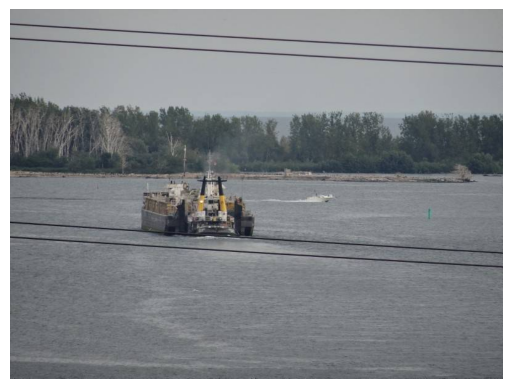

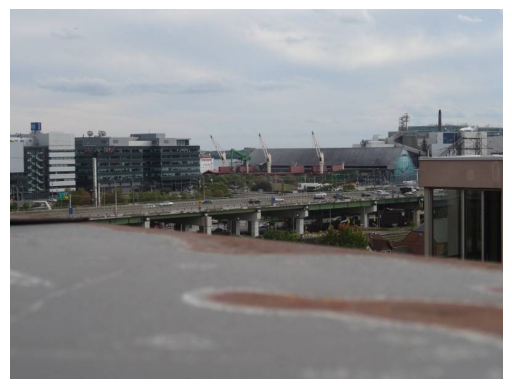

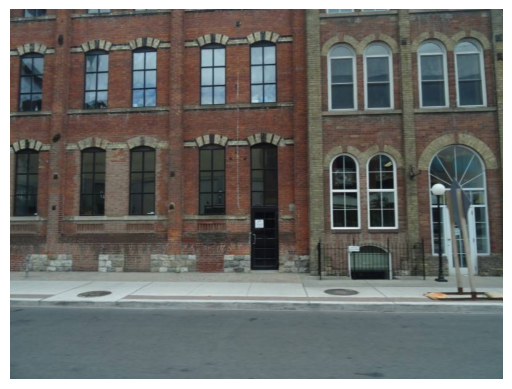

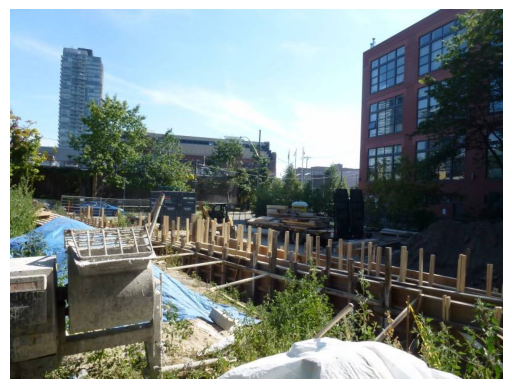

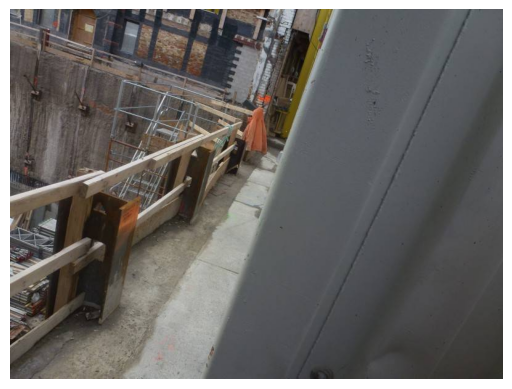

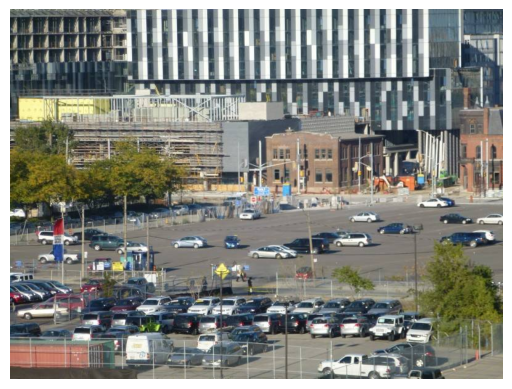

In [9]:
# Loading and displaying images from the folders

# Get first 10 images from the Toronto category landmark_id==126637
images = join_w_landmark_id.id[join_w_landmark_id.landmark_id==126637][:10]

for image_id in images:
    f1 = image_id[0]
    f2 = image_id[1]
    f3 = image_id[2]
    local_image = np.array(PIL.Image.open(f'{data_path}/train/{f1}/{f2}/{f3}/{image_id}.jpg'))
    # local_image = plt.imread(f'{data_path}/train/{f1}/{f2}/{f3}/{image_id}.jpg')
    fig = plt.figure()
    plt.imshow(local_image)
    plt.axis('off')
    plt.show()